### Practice resources: 
Streamlit -- https://towardsdatascience.com/create-a-web-app-for-your-data-science-project-in-under-an-hour-552553236ded
ML -- https://medium.com/analytics-vidhya/exploratory-data-analysis-of-nyc-taxi-trip-duration-dataset-using-python-257fdef2749e

In [1]:
##Streamlit display things linearly = everything you want to show goes below the previous thing
#######you can also hav e sidebars: from which you can collecti nput from the users (sliders/text fields/drop down)
#######containers: divide the page into horizontal sections and columns let you divide it into vertical sections
######columns go inside containers but you dont not have to have solumns at all
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
siteHeader = st.beta_container()
dataExploration = st.beta_container()
newFeatures = st.beta_container()
modelTraining = st.beta_container()

#'with'divider helps to write code that belong to a certain container inside its limit
with siteHeader:
    st.text('In this project I look into...And I try ...I worked with the dataset from...')
    st.title('Hello, welcome to my app!')
    
with dataExploration:
    st.header('Dataset: Iris flower dataset')
    st.text('I found this dataset at...I decided to work with it becasue...')

with newFeatures:
    st.header('New features I came up with')
    st.text('Let\'s take a look into the features I generated.')

with modelTraining:
    st.header('Model training')
    st.text('In this section you can select the hyperparameters!')
    

In [3]:
import pandas as pd

#data resources: https://www.kaggle.com/c/nyc-taxi-trip-duration/data
taxi = pd.read_csv("taxi.csv")
taxi.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
taxi.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

****what we know form observing the dataset:
1) pickup_datetime and dropoff_datetime are stored as object which must be converted to datetime for better analysis
2) store_and_fwd_flag is categorical
3)id and vendoe_id are nominal

In [5]:
#use describe function to take a look at the numerical columns
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


****insight from data description
1) there is no missing data -> all count are the same as the sample size
2) the passenger count varies between 1 - 9 with most number of people being 1 or 2
3) the trip duration varying from 1s - 3526282s ~ 979hrs -> there are defintely some outliers present which must be treated

In [6]:
#take a look at the non_numerical columns
non_num_cols = ['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(taxi[non_num_cols].count())

id                    1458644
pickup_datetime       1458644
dropoff_datetime      1458644
store_and_fwd_flag    1458644
dtype: int64


****insight
1) no missing value either


In [7]:
#tranform the pickup_datetime and dropoff_datetime to date and time
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])

#### ***performe univariate analysis 
-> so to have a look at the distribution of various variables in the dataset

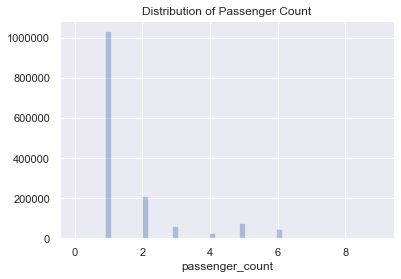

In [8]:

sns.distplot(taxi['passenger_count'],kde=False) #to turn the KDE plot off
plt.title('Distribution of Passenger Count')
plt.show()

****insight
1) mostly 1 and 2 passengers avail the cab

In [9]:
taxi['pickup_datetime'].nunique()

1380222

In [10]:
taxi['dropoff_datetime'].nunique()

1380377

****insight
1) there are many different pickup and dropoff dates in these 2 columns -> better to transform these data into days of the week

In [11]:
taxi['pickup_day'] = taxi['pickup_datetime'].dt.day_name()
taxi['dropoff_day'] = taxi['dropoff_datetime'].dt.day_name()
taxi['pickup_month'] = taxi['pickup_datetime'].dt.month
taxi['dropoff_month'] = taxi['dropoff_datetime'].dt.month

In [12]:
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3


In [13]:
taxi['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [14]:
taxi['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

****insight
1) most pickup and drofoff are on Friday and least on Monday

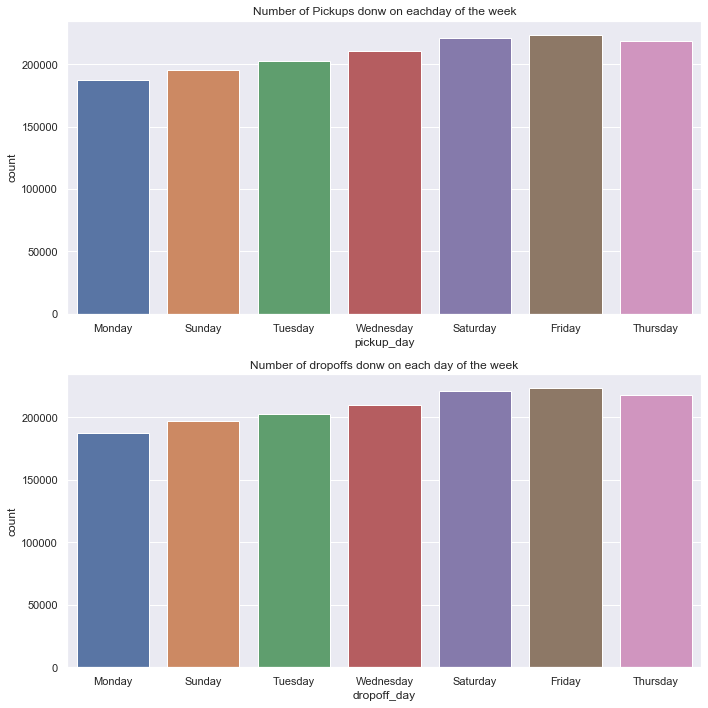

In [15]:
#visulize the distributions of days in graph 
figure,ax = plt.subplots(nrows = 2,ncols=1,figsize=(10,10))
sns.countplot(x = 'pickup_day',data = taxi, ax=ax[0])
ax[0].set_title('Number of Pickups donw on eachday of the week')

sns.countplot(x = 'dropoff_day', data = taxi, ax=ax[1])
ax[1].set_title('Number of dropoffs donw on each day of the week')
plt.tight_layout()


In [16]:
#distribution of pickup and dropoff time in a day
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'

#datetime.datetime.striptime() creates a datetime object from the given string
#detail on Datetime formate: https://www.programiz.com/python-programming/datetime/strptime
taxi['pickup_timezone'] = taxi['pickup_datetime'].apply(lambda x: timezone(datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").time())) 
                                                                                                    #formate used in taxi  change datetime object to time object

taxi['dropoff_timezone'] = taxi['dropoff_datetime'].apply(lambda x: timezone(datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").time())) 



In [17]:
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,late night,late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,midday,midday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,midday,midday


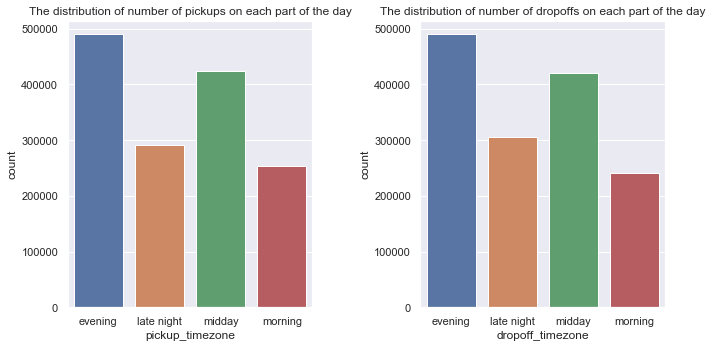

In [18]:
figure,ax = plt.subplots(nrows = 1, ncols = 2,figsize=(10,5))

sns.countplot(x='pickup_timezone',data=taxi,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')

sns.countplot(x='dropoff_timezone',data=taxi,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')

plt.tight_layout()

****insight
1) most pickups and dropoffs occur in the evening while the least drops and pickups occure during morning

Text(0.5, 1.0, 'Distribution of dropoff hours')

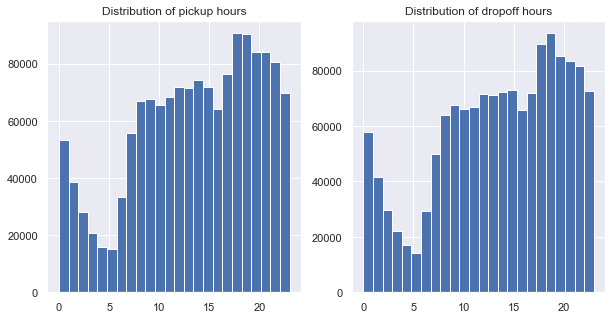

In [19]:
#goes deeper into the hour of the day

figure,ax = plt.subplots(nrows = 1, ncols=2,figsize=(10,5))
taxi['pickup_hour']=taxi['pickup_datetime'].dt.hour
taxi['dropoff_hour']=taxi['dropoff_datetime'].dt.hour

taxi.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')

taxi.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')


****insight
1) two graphs are similar and aligned with the division of the hours of the day into 4 parts 

In [20]:
#distribution of the stored and forward flag
taxi['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

****insight
1) the number of N ~ 99.5% -> we can explore whether this have any correlation with the duration of the trip

Text(0.5, 1.0, 'The distribution of the trip duration')

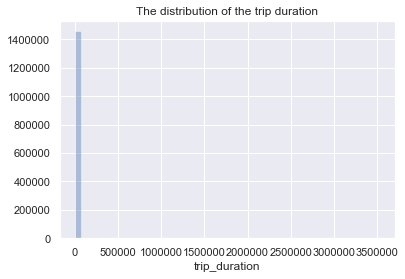

In [21]:
#distribution of the trip duration
sns.distplot(taxi['trip_duration'],kde=False)
plt.title('The distribution of the trip duration')

****insight
1) the histogram shows extreme right skewness -> there must be outliers -->> boxplot to figure this out

Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

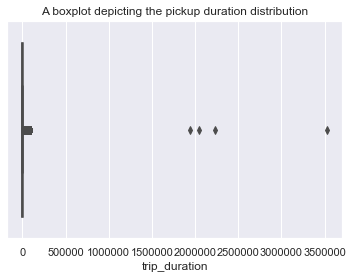

In [22]:
sns.boxplot(taxi['trip_duration'],orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

****insight
1)there is only value larger than 2000000 while all others are somewhere between 0 and XXX -> have a look the largest num in duration

In [23]:
a = taxi['trip_duration'].nlargest(4)
taxi = taxi.drop(index = a.index)

Text(0.5, 1.0, 'The distribution of the trip duration')

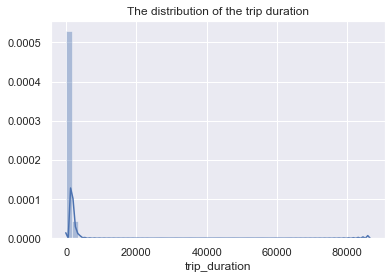

In [24]:
#distribution of the trip duration
sns.distplot(taxi['trip_duration'],kde=True)
plt.title('The distribution of the trip duration')

****insight:
1) there is still an extreme right skewness -> divid the trip_duration into some intervals -->>
intervales:
[0,5), [5,10),[10,15),[15,20),[20,++)

In [25]:
bins = np.array([0,1800,3600,5400,7200,90000])
taxi['duration_time'] = pd.cut(taxi.trip_duration,bins,labels=["<5","5-10","10-15","15-20",">20"])

Text(0.5, 1.0, 'The distribution of the duration time')

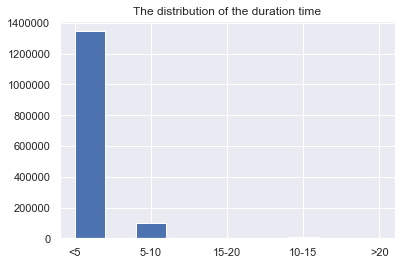

In [26]:
taxi.duration_time.hist()
plt.title('The distribution of the duration time')

Text(0.5, 1.0, 'The distribution of the duration time')

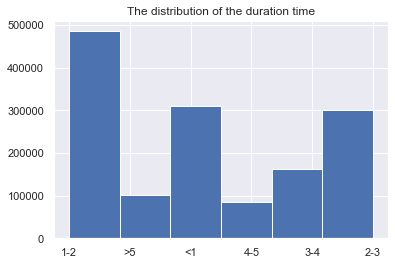

In [27]:
taxi.drop(columns=['duration_time'])
bins = np.array([0,360,720,1080,1440,1800,3600])
taxi['duration_time'] = pd.cut(taxi.trip_duration,bins,labels=["<1","1-2","2-3","3-4","4-5",">5"])
taxi.duration_time.hist(bins=6)
plt.title('The distribution of the duration time')

Text(0.5, 1.0, 'The distribution of Pick up Longitude')

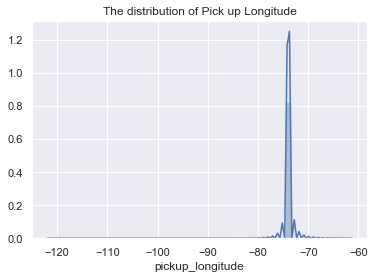

In [28]:
#take a look at the ditribution of location to get a sense of route
#distribution of pickup logitude
sns.distplot(taxi['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

Text(0.5, 1.0, 'The distribution of Drop off Longitude')

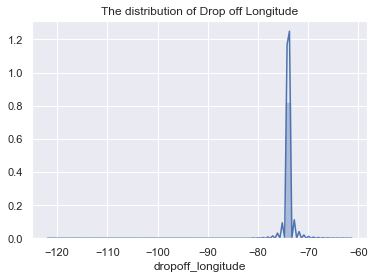

In [29]:
sns.distplot(taxi['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

****insight:
1)in terms of logtitude: pickup and dropoff are similar

Text(0.5, 1.0, 'The distribution of pick up Latitude')

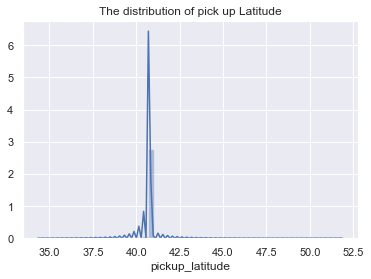

In [30]:
sns.distplot(taxi['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

Text(0.5, 1.0, 'The distribution of drop off Latitude')

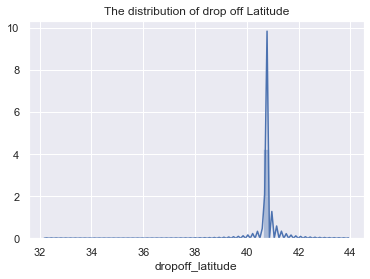

In [31]:
sns.distplot(taxi['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

****insight:
1) notable difference in terms of latitude

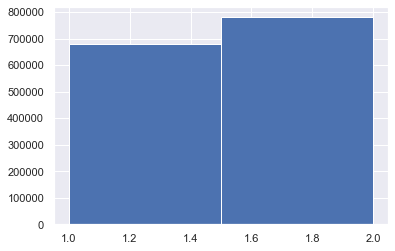

In [32]:
taxi['vendor_id'].hist(bins=2) #no much difference

#### ***performe bivariate analysis 
-> so to take a look at the relationship between each of the variables with the target variable: duration_trip

Text(0.5, 1, 'The average trip duration per dropoff day of the week')

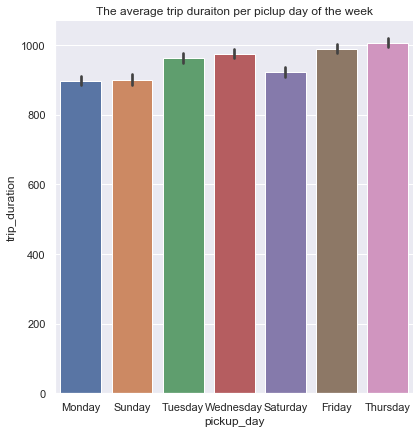

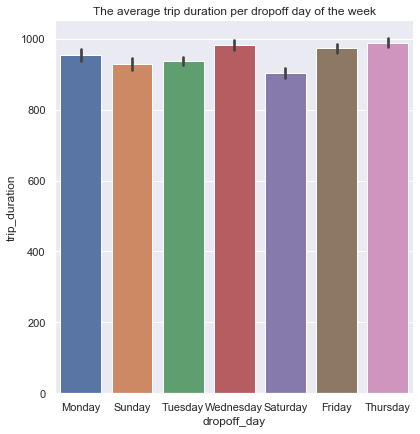

In [33]:
#between trip_duration and the day of the week
sns.catplot(x='pickup_day',y='trip_duration',kind='bar',data=taxi,height=6,aspect=1)
plt.title('The average trip duraiton per piclup day of the week')

sns.catplot(x='dropoff_day',y='trip_duration',kind='bar',data=taxi,height=6,aspect=1)
plt.title('The average trip duration per dropoff day of the week')
#the black bar on the top is the error bar, indicating the unvertainty around that estimate

****insight:
1)from looking at the average: Thursday have the highest while Saturday the least
2)it is not enough to include only averages, we need to take into consideration the percetage of short medium and long trips taken on each day

Text(0.5, 1.0, 'The distribution of percentage of difference duration of trips')

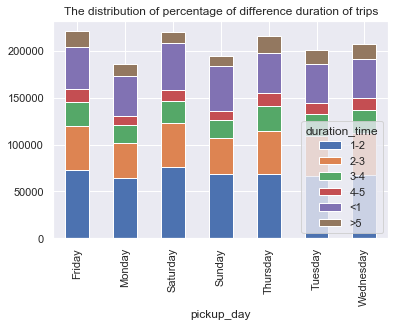

In [34]:
ax1 = taxi.groupby('pickup_day')['duration_time'].value_counts(normalize=False).unstack()
ax1.plot(kind='bar',stacked='True')
plt.title('The distribution of percentage of difference duration of trips')



****insights:
1)The most number trips which last >5 were taken on Thursday followed by Friday and Wednesday
2)Trip duratio are most common between 1-2, 2-3 and <1

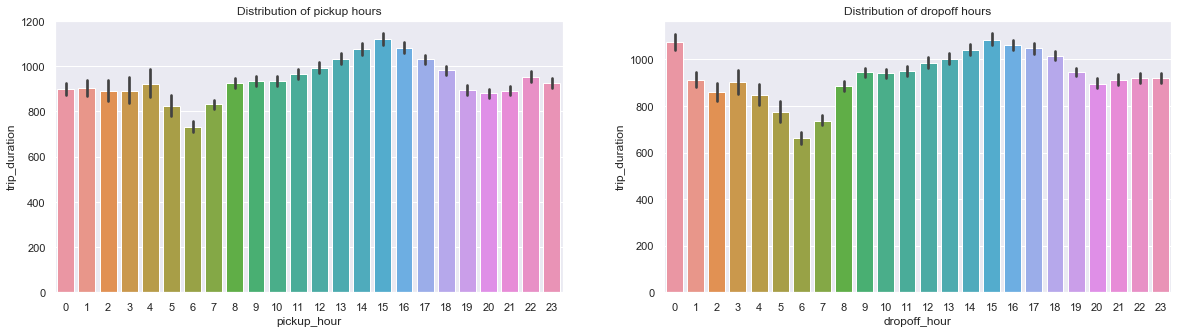

In [35]:
#relationship between trip duration and the time of the day
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Distribution of pickup hours')
ax=sns.barplot(x="pickup_hour", y="trip_duration",data=taxi,ax=ax1)
ax2.set_title('Distribution of dropoff hours')
ax=sns.barplot(x="dropoff_hour", y="trip_duration",data=taxi,ax=ax2)
plt.show()

****insight:
1) the highest average time taken to complete atrip are for trips started in midday (14-17) and the least are the ones taken in the early morning (6-7)

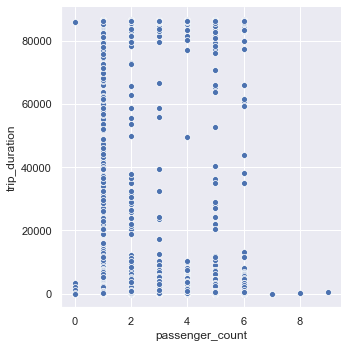

In [36]:
#relationship between passenger count and duration
sns.relplot(x='passenger_count',y='trip_duration',data=taxi,kind='scatter')

****insight:
1）passenger count has no such relationship with trip duration. 
2）noted that there are no long trips taken by higher passengers counts like 7 or 9. 

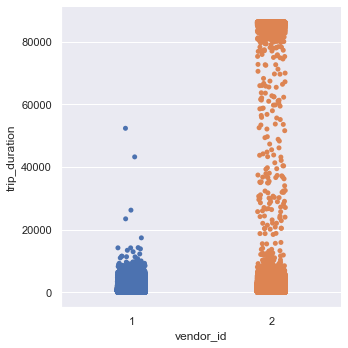

In [37]:
#relationship between vendoe id and duraiton
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=taxi)

****insight:
1)vendor 1 mostly provides shoert trip duration while vendor 2 provides both short and long duration

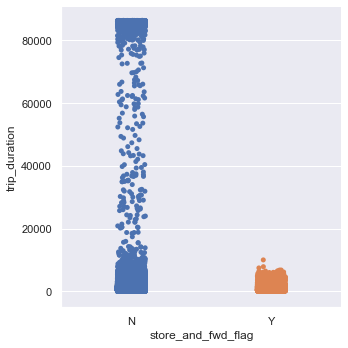

In [38]:
#relationship between store forward flag and duration
sns.catplot(x='store_and_fwd_flag',y='trip_duration',kind='strip',data=taxi)

****insight:
1) the flag was stored only for short duration and never for long

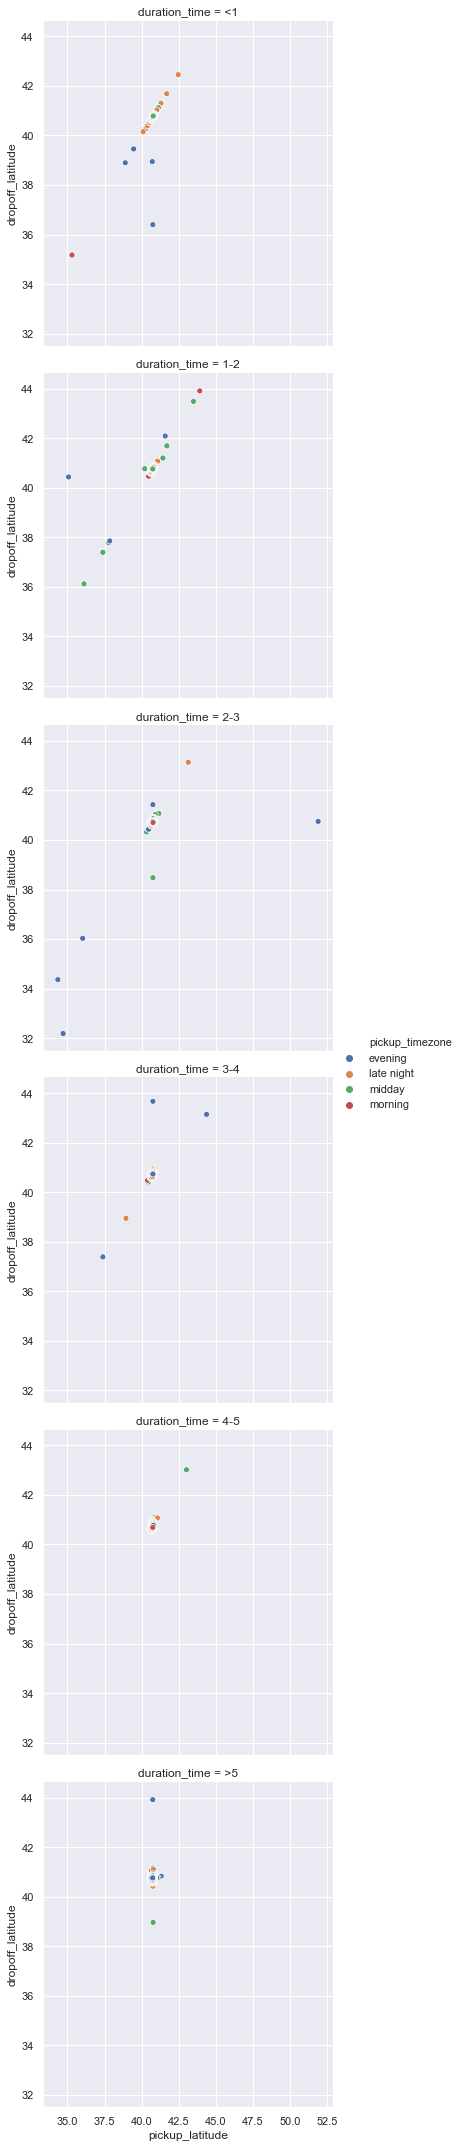

In [39]:
#relationship between geographical loation and duration
sns.relplot(x='pickup_latitude',y='dropoff_latitude',hue='pickup_timezone',row='duration_time',data=taxi)


In [40]:
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,pickup_hour,dropoff_hour,duration_time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,evening,evening,17,17,1-2
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,late night,late night,0,0,1-2
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,midday,midday,11,12,>5
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,evening,evening,19,19,1-2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,midday,midday,13,13,1-2


In [41]:
print('The value of largest 10 trips duration values are as follows:\n{}'.format(taxi['trip_duration'].nlargest(10)))
print('The number of rows with 1 as their trip duration values is {}'.format(len(taxi[taxi['trip_duration']==1])))

The value of largest 10 trips duration values are as follows:
1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
753765     86379
91717      86378
1221666    86378
66346      86377
1138915    86377
Name: trip_duration, dtype: int64
The number of rows with 1 as their trip duration values is 33


****insights:
1)there is 33 values with 1 seconds as its duration -> drop them all

In [42]:
taxi = taxi[taxi['trip_duration']!=1]

-> we will now create another column with trip duration in hours

In [43]:
taxi['trip_duration_hour'] = taxi['trip_duration']/3600
taxi.head()

2021-01-20 09:27:36.080 INFO    numexpr.utils: NumExpr defaulting to 4 threads.
/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,pickup_hour,dropoff_hour,duration_time,trip_duration_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,Monday,3,3,evening,evening,17,17,1-2,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,Sunday,6,6,late night,late night,0,0,1-2,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,Tuesday,1,1,midday,midday,11,12,>5,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,Wednesday,4,4,evening,evening,19,19,1-2,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,Saturday,3,3,midday,midday,13,13,1-2,0.120833


In [44]:
taxi.passenger_count.value_counts()

1    1033506
2     210316
5      78088
3      59896
6      48333
4      28404
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64

****insights:
1) there is very little count of 0,7,9,8 compared with others -> drop them

In [45]:
taxi=taxi[taxi['passenger_count']!=0]
taxi=taxi[taxi['passenger_count']<=6]

In [46]:
taxi['dropoff_month'].value_counts()

3    256118
4    251618
5    248540
2    238274
6    234235
1    229631
7       127
Name: dropoff_month, dtype: int64

In [47]:
taxi['pickup_month'].value_counts()

3    256174
4    251627
5    248472
2    238280
6    234308
1    229682
Name: pickup_month, dtype: int64

****insights:
1)all the months has uniiform distribution of trips
2) no data is present for pickup monthes beyond june but there are few data presnet in July for drop off -> it maybe outlier, need to take a look at them

In [48]:
print(taxi[taxi['dropoff_month']==7].pickup_datetime.dt.month.value_counts())
print(taxi[taxi['dropoff_month']==7].pickup_datetime.dt.day.value_counts())

6    127
Name: pickup_datetime, dtype: int64
30    127
Name: pickup_datetime, dtype: int64


****insights:
1) we can find that all the dropoff month done in July stated on June 30, data seems fine

In [49]:
# we create a funciton that returns the distance with lattitude and lognitude
from math import radians, cos, sin, asin, sqrt

def haversine(df):
    lat1,log1,lat2,log2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude
    R = 3959.87433
    
    #radians is function that converts the given angle from degrees to radians
    dLat = radians(lat2-lat1)
    dLon = radians(log2-log1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    
    return R*c

taxi['distance'] = taxi.apply(lambda x: haversine(x),axis=1)

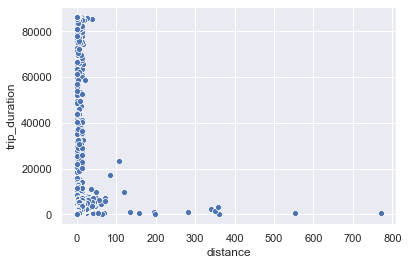

In [50]:
#we now take a look at hte distnace against trip_duration
sns.scatterplot(x='distance',y='trip_duration',data=taxi)


****insights:
1)we can see several outliers with values much beyond 200 and many values with trip_distance = 0, depicting cancelled rides 

In [51]:
print('The number of rows with distance = 0 are {}'.format((len(taxi[taxi.distance==0]))))

The number of rows with distance = 0 are 5876


****insights:
1) there are quite a number of cancelled trips -> replace them with average distnace

In [52]:
mean_distance = taxi['distance'].mean()
taxi.loc[taxi['distance']==0,'distance'] = mean_distance

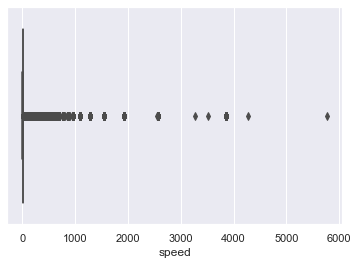

In [53]:
#create a new feature called speed -> help us identify data points where time taken and distance covered does not match up
taxi['speed'] = taxi['distance']/taxi['trip_duration_hour']
sns.boxplot(taxi['speed'])

In [54]:
print('****insights:\n1) the average speed of a taxi in NYC is {}\nThere are several data points with a speed way beyond that'.format(taxi.speed.mean()))

****insights:
1) the average speed of a taxi in NYC is 10.074373522981062
There are several data points with a speed way beyond that


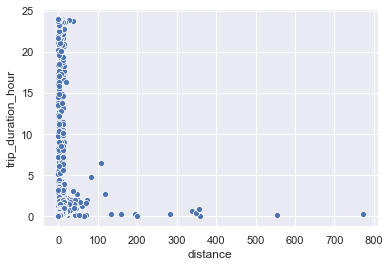

In [55]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=taxi)

(0, 200)

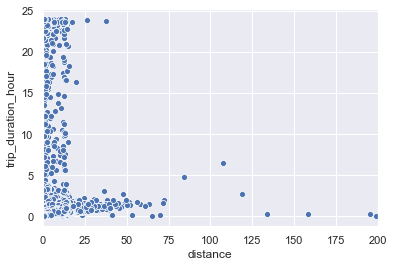

In [56]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=taxi)
plt.xlim(0,200)

****insights:
1) as we known, the average speed is around 11km/hour -> for distance <20, time taken should <10. But there are a large amount of data points with distance <20 and time >10 -->> maybe due to extreme road congestion ---->>> log tranform these columns and have a look at the distribution again

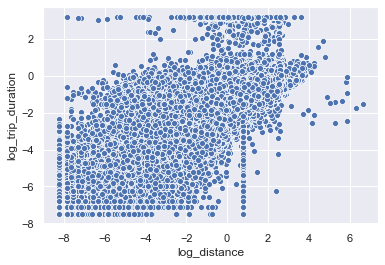

In [57]:
#rationale behind log transformation -> it is often used to make highly skewed distributions less skewed
taxi['log_distance'] = np.log(taxi.distance)
taxi['log_trip_duration'] = np.log(taxi.trip_duration_hour)

sns.scatterplot(x='log_distance',y='log_trip_duration',data=taxi)

****insights:
1)here we see that the log transform value of trip duration and distance has a somwhat linear relationship. But still there are some anomalous data points where the duration value is not changing even with the change in distance -->> we will thus drop the rows beyond log_trip_duration > 2

In [58]:
taxi=taxi[taxi.log_trip_duration<2]
taxi.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_timezone', 'dropoff_timezone', 'pickup_hour',
       'dropoff_hour', 'duration_time', 'trip_duration_hour', 'distance',
       'speed', 'log_distance', 'log_trip_duration'],
      dtype='object')

In [59]:
#because the datafram taxi is now too complex with too many features ->
#we will create a new dataframto select only the features which had 
#some effect on target: e.g. latitude&lognitude into distance etc.

In [60]:
final = taxi.loc[:,['passenger_count','store_and_fwd_flag','trip_duration','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone','dropoff_timezone','speed','log_distance','distance']]

In [61]:
final.dtypes

passenger_count         int64
store_and_fwd_flag     object
trip_duration           int64
pickup_day             object
dropoff_day            object
pickup_month            int64
dropoff_month           int64
pickup_timezone        object
dropoff_timezone       object
speed                 float64
log_distance          float64
distance              float64
dtype: object

In [62]:
#transform the categorial features from final through one hot encoding
final = pd.get_dummies(final,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_timezone','dropoff_timezone'])

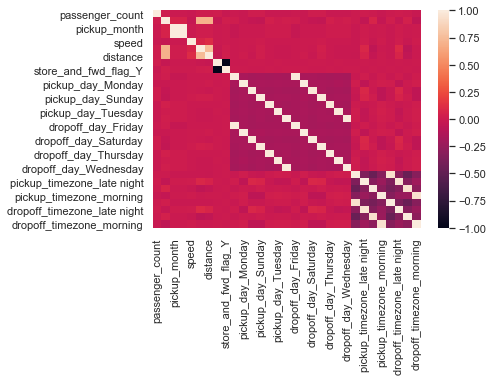

In [63]:
sns.heatmap(final.corr())

****insights:
1)doems features has high correlation with other features and some are not correlated at all

### ***Modelling
-> baseline model

In [64]:
base_line_col = ['distance']
predictor_cols = ['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y',
                 'pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday',
                 'pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
                 'dropoff_day_Tuesday','dropoff_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6',
                 'dropoff_month_1','dropoff_month_5','dropoff_month_6','pickup_timezone_late night','pickup_timezone_midday'
                 'pickup_timezone_morning','dropoff_timezone_evening','dropoff_timezone_late night','dropoff_timezone_late night',
                 'dropoff_timezone_midday','dropoff_timezone_morning']
predictors = ['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y',
                 'pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday',
                 'pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
                 'dropoff_day_Tuesday','dropoff_day_Wednesday',
                 'pickup_timezone_late night','pickup_timezone_midday',
                 'dropoff_timezone_evening','dropoff_timezone_late night','dropoff_timezone_late night',
                 'dropoff_timezone_morning']

'pickup_timezone_middaydropoff_timezone_evening'

target_col = ['trip_duration']

In [65]:
#we will use Root Means Squared Error as evaluation metric:
####1) RMSE
####2) The average value of the RMSE at each fold of K-Fold cross validation 
#######and the test data
####3) The predicted values on the test data
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def modelfit(estimator,data_train,data_test,predictors,target):
    #print(data_train.head())
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    train_pred=estimator.predict(data_train[predictors])

    cv_score = cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=20,scoring='neg_mean_squared_error')
    
    cv_score=np.sqrt(np.abs(cv_score))
    
    print('\nModel Report\nRMSE on Train Data: %.4g'%np.sqrt(metrics.mean_squared_error(data_train.loc[:,target].values,train_pred)))
    print('CV Score : Mean - %.4g | Std - %.4g | Min _%.4g | Max - %.4g'%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    test_pred=estimator.predict(data_test[predictors])
    print("RMSE on Test Data: %.4g"%np.sqrt(metrics.mean_squared_error(data_test.loc[:,target].values,test_pred)))
    
    return test_pred
    

In [66]:
#split data into train and test
#we use the mean value of trip duration as the prediction for baseline model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
validation_size = 0.2
seed = 7
x_train, x_test = train_test_split(final,test_size=validation_size,random_state=seed)
mean_pred=np.repeat(x_train[target_col].mean(),len(x_test[target_col]))
from sklearn.metrics import mean_squared_error as mae
sqrt(mae(x_test[target_col],mean_pred))

665.3702902764425

****we will now use the value of 665 as the base and try to achieve a RMSE less than this

In [67]:
#first model:take the distance feature as the onlu predictor columns adnd build a linear regression model
alg1 = LinearRegression(normalize = True)
print('The baseline model')
y_pred = modelfit(alg1,x_train,x_test,base_line_col,target_col)
coef1 = alg1.coef_
print('The coefficient is {}'.format(coef1))


The baseline model

Model Report
RMSE on Train Data: 486.4
CV Score : Mean - 484.3 | Std - 77.58 | Min _434.2 | Max - 777.9
RMSE on Test Data: 450.3
The coefficient is [[170.1603472]]


****insights:
1)all the values are much less than the mean prediction RMSE. Thus our model worked better 


Model Report
RMSE on Train Data: 476.4
CV Score : Mean - 473.9 | Std - 79.98 | Min _422.6 | Max - 775.9
RMSE on Test Data: 438.9


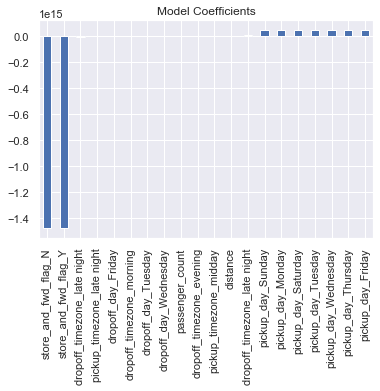

In [68]:
alg2 = LinearRegression(normalize = True) #transform the independent variables so that it lies in a common scale

y_pred = modelfit(alg2,x_train,x_test,predictors,target_col)
coef1 = pd.Series(alg2.coef_[0],predictors).sort_values()
coef1.plot(kind='bar',title='Model Coefficients')

****insights:
1) we see that the regression model performs better + we also plotted the coefficients fitted for each feature

/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


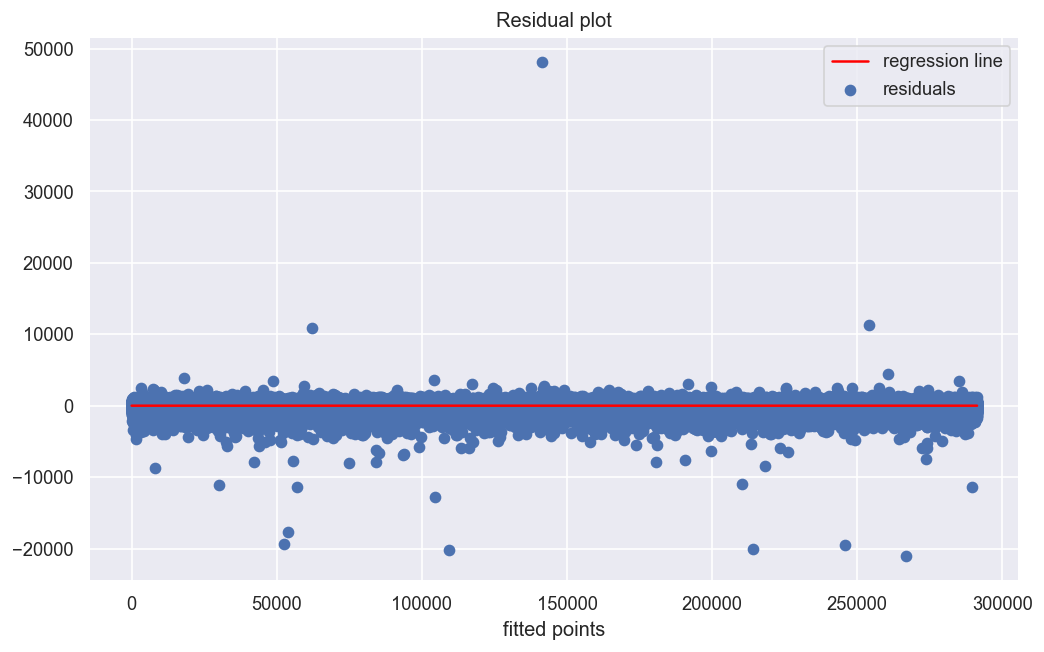

In [69]:
#plot the residuals to see whether the assumption of Homoskedasticity
residuals = y_pred-x_test[target_col]#Heteroskedasticity
plt.figure(figsize=(10,6),dpi=120,facecolor='w',edgecolor='b')
f = range(0,residuals.size)
k = [0 for i in range(0,residuals.size)]
plt.scatter(f,residuals,label='residuals')
plt.plot(f,k,color = 'red',label = 'regression line')
plt.xlabel('fitted points')
plt.title('residuals')
plt.title('Residual plot')
plt.legend()


****insights:
1) distribution of the rsiduals is Homoscedastic - the assumption of regression holds true